In [1]:
import warnings
import intake
import xarray as xr
import proplot as plot
import matplotlib.pyplot as plt
import pandas as pd
import cftime

warnings.filterwarnings('ignore')

# Fetching data from CMIP6 archive

In [2]:
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
dataframe = intake.open_esm_datastore(url)

In [3]:
type(dataframe)

intake_esm.core.esm_datastore

In [4]:
dataframe.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [5]:
models = dataframe.search(experiment_id="historical",
                          variable_id="pr",
                          institution_id="MOHC",
                          member_id="r1i1p1f2")

In [6]:
models

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,2
variable_id,1
grid_label,1
zstore,2
dcpp_init_year,0


In [7]:
datasets = models.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [8]:
datasets.keys()

dict_keys(['CMIP.MOHC.UKESM1-0-LL.historical.Amon.gn', 'CMIP.MOHC.UKESM1-0-LL.historical.day.gn'])

In [9]:
ds = datasets["CMIP.MOHC.UKESM1-0-LL.historical.Amon.gn"]

In [10]:
ds

<xarray.Dataset>
Dimensions:    (lat: 144, bnds: 2, lon: 192, member_id: 1, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f2'
Dimensions without coordinates: bnds
Data variables:
    pr         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 144, 192), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   144000.0
    cmor_version:            3.4.0
    ...                      ...
    variant_label:           r1i1p1f2
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/f35b8979-27a3-4e33-9708-43fb5001fb9...
    version_id:              v20190406
    intake_esm_varname:      ['pr']
    intake_esm_dataset_key:  CMIP.MOHC.UKESM1-0-LL.historical.Amon.gn

In [11]:
type(ds)

xarray.core.dataset.Dataset

In [12]:
df = ds.to_dataframe()

# Understanding the data

In this data, there is one entry for each month's precipitation, for each combination of latitude and longitude.

The latitude varies from -89.375 to 89.375 in 1.25 degree increments (143 values in total).

The longitude varies from 0.975 to 359.0625 in 1.875 degree increments (384 values in total).

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109486080 entries, (-89.375, 0, 0.9375, 'r1i1p1f2', cftime.Datetime360Day(1850, 1, 16, 0, 0, 0, 0, has_year_zero=True)) to (89.375, 1, 359.0625, 'r1i1p1f2', cftime.Datetime360Day(2014, 12, 16, 0, 0, 0, 0, has_year_zero=True))
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   lat_bnds   float64
 1   lon_bnds   float64
 2   pr         float32
 3   time_bnds  object 
dtypes: float32(1), float64(2), object(1)
memory usage: 3.7+ GB


For each degree of latitude, we have 760,320 measurements, because there are 1980 precipitation measurements for each of the 384 values of longitude.

One precipitation measurement per month, for 1980 months ranging from 01/1850 to 12/2014:

In [54]:
df.head(13)

lat_bnds  lon_bnds  \
lat     bnds lon    member_id time                                      
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00     -90.0       0.0   
                              1850-02-16 00:00:00     -90.0       0.0   
                              1850-03-16 00:00:00     -90.0       0.0   
                              1850-04-16 00:00:00     -90.0       0.0   
                              1850-05-16 00:00:00     -90.0       0.0   
                              1850-06-16 00:00:00     -90.0       0.0   
                              1850-07-16 00:00:00     -90.0       0.0   
                              1850-08-16 00:00:00     -90.0       0.0   
                              1850-09-16 00:00:00     -90.0       0.0   
                              1850-10-16 00:00:00     -90.0       0.0   
                              1850-11-16 00:00:00     -90.0       0.0   
                              1850-12-16 00:00:00     -90.0       0.0   
                              1851-01-16 00:00:00     -90.0       0.0   

                                                             pr  \
lat     bnds lon    member_id time                                
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00  2.528526e-06   
                              1850-02-16 00:00:00  1.196780e-06   
                              1850-03-16 00:00:00  3.137424e-07   
                              1850-04-16 00:00:00  1.142245e-06   
                              1850-05-16 00:00:00  1.526145e-06   
                              1850-06-16 00:00:00  2.687166e-06   
                              1850-07-16 00:00:00  3.467898e-06   
                              1850-08-16 00:00:00  2.683400e-06   
                              1850-09-16 00:00:00  1.678475e-06   
                              1850-10-16 00:00:00  7.891462e-07   
                              1850-11-16 00:00:00  1.907595e-06   
                              1850-12-16 00:00:00  2.452062e-06   
                              1851-01-16 00:00:00  1.927868e-06   

                                                             time_bnds  
lat     bnds lon    member_id time                                      
-89.375 0    0.9375 r1i1p1f2  1850-01-16 00:00:00  1850-01-01 00:00:00  
                              1850-02-16 00:00:00  1850-02-01 00:00:00  
                              1850-03-16 00:00:00  1850-03-01 00:00:00  
                              1850-04-16 00:00:00  1850-04-01 00:00:00  
                              1850-05-16 00:00:00  1850-05-01 00:00:00  
                              1850-06-16 00:00:00  1850-06-01 00:00:00  
                              1850-07-16 00:00:00  1850-07-01 00:00:00  
                              1850-08-16 00:00:00  1850-08-01 00:00:00  
                              1850-09-16 00:00:00  1850-09-01 00:00:00  
                              1850-10-16 00:00:00  1850-10-01 00:00:00  
                              1850-11-16 00:00:00  1850-11-01 00:00:00  
                              1850-12-16 00:00:00  1850-12-01 00:00:00  
                              1851-01-16 00:00:00  1851-01-01 00:00:00

# Splitting the data into training-validation-test

In [59]:
training_set = df.loc[df.index.get_level_values("time") <= cftime.Datetime360Day(1965, 6, 16, 0, 0, 0, 0, has_year_zero=True)]
test_set = df.loc[df.index.get_level_values("time") >= cftime.Datetime360Day(1982, 1, 16, 0, 0, 0, 0, has_year_zero=True)]

In [58]:
validation_set = df.loc[(df.index.get_level_values("time") > cftime.Datetime360Day(1965, 6, 16, 0, 0, 0, 0, has_year_zero=True)) & (df.index.get_level_values("time") < cftime.Datetime360Day(1982, 1, 16, 0, 0, 0, 0, has_year_zero=True))]

# Quick plot

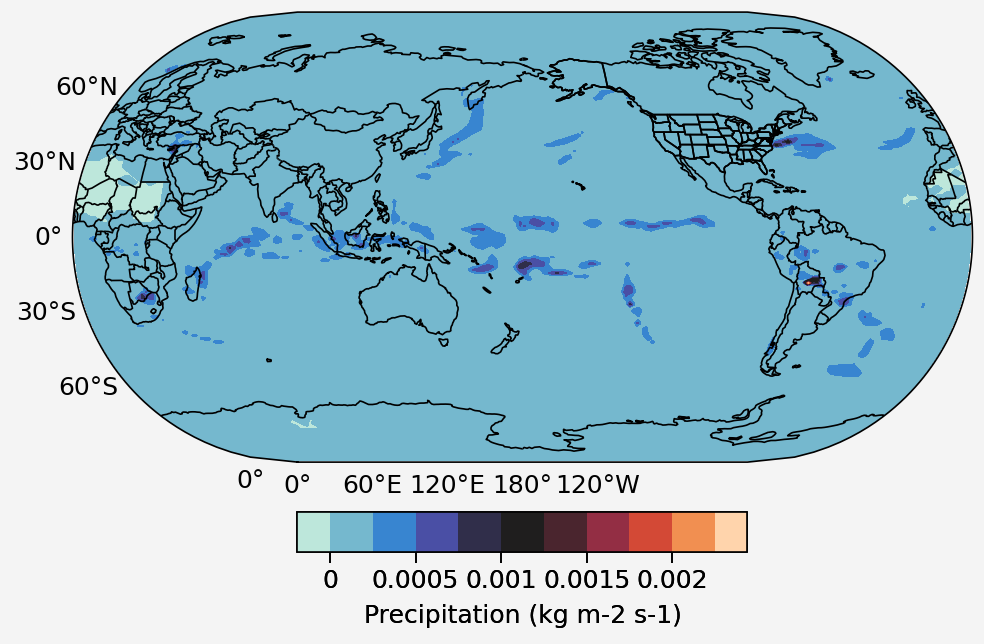

In [11]:
fig, ax = plot.subplots(axwidth=4.5, tight=True, proj='eck3', proj_kw={"lon_0": 180},)

ax.format(land=False, coast=True, innerborders=True, borders=True, labels=True, geogridlinewidth=0,)

map1 = ax.contourf(ds["lon"], ds["lat"], ds["pr"][0,0,:,:], cmap="IceFire", extend="both")

ax.colorbar(map1, loc="b", shrink=0.5, extendrect=True)

plt.show()